# DS3000 Foundations of Data Science
## Dialogue of Civilizations
May 15, 2024

Content:
- Exploring Data
    - Plotting
    - Cleaning Data
    - Basic Data Summaries/Intro to Vectors
    - Intro to Machine Learning (as full group)
    - Ethics in Machine Learning Exercise (as full group)
     
Planned Time: ~3 hour

Next Thing: Data Lab (Lab 2)

In [22]:
# packages (I'm just going to update this as we go with the most important things we've used)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import plotly.express as px

# Exploring Data with Plots and Basic Data Summaries

After we did all this work to scrape or grab our data, what next? Assuming your data is all clean (a big assumption!), the next step is basic level analysis:
- Graphically describe/summarize the features in your data set
- Numerically describe/summarize the features in your data set

This is an important step! You can't just jump directly into machine learning, since a lot of the choices you make when constructing your machine learning models depends on your understanding of the data. A quick plot:

In [23]:
# the recipe data frame from the end of the last notebook
big_df_recipe = pd.read_csv('big_belgian_recipe_df.csv')
big_df_recipe.head()

,name,href,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Total Sugars,Protein,Vitamin C,Calcium,Iron,Potassium,query
0,Creamy Strawberry Crepes,https://www.allrecipes.com/recipe/143886/cream...,37.0,22.0,205.0,406.0,49.0,3.0,32.0,10.0,62.0,115.0,2.0,319.0,crepes
1,Vanilla Crepes,https://www.allrecipes.com/recipe/95817/vanill...,7.0,4.0,66.0,146.0,16.0,0.0,4.0,3.0,0.0,45.0,1.0,72.0,crepes
2,Banana Crepes,https://www.allrecipes.com/recipe/25216/banana...,29.0,17.0,146.0,252.0,61.0,4.0,31.0,8.0,11.0,110.0,2.0,583.0,crepes
3,Egg-White Crepes,https://www.allrecipes.com/recipe/141970/egg-w...,8.0,1.0,1.0,83.0,33.0,5.0,10.0,10.0,NaN,89.0,1.0,272.0,crepes
4,Claire's Yummy Crepes,https://www.allrecipes.com/recipe/20743/claire...,4.0,2.0,69.0,251.0,36.0,1.0,5.0,9.0,0.0,110.0,2.0,189.0,crepes


In [24]:
import plotly.express as px

px.scatter(data_frame=big_df_recipe, x='Calcium', y='Potassium', color='query', hover_data=['name'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([['Creamy Strawberry Crepes'],
                                   ['Vanilla Crepes'],
                                   ['Banana Crepes'],
                                   ['Egg-White Crepes'],
                                   ["Claire's Yummy Crepes"],
                                   ['Crepes with Spinach, Bacon and Mushroom Filling'],
                                   ['Dessert Crepes'],
                                   ['Strawberry Crepes'],
                                   ['Breakfast Crepes'],
                                   ['Chocolate Hazelnut Fruit Crepes'],
                                   ['Chocolate Crepes'],
                                   ['State Fair Crepes'],
                                   ['Yummy Apple Cinnamon Crepes'],
                                   ['Shrimp and Scallop Crepes'],
                                   ['Czech Crepes'],
                                   ['Basic Crêpes'],
                                   ['Chicken and Mushroom Crepes'],
                                   ['Easy Chicken-Stuffed Crepes'],
                                   ['Pumpkin Crepes with Fontina Cheese Sauce'],
                                   ['Cajun Shrimp Crepes'],
                                   ['Chicken Street Crepes'],
                                   ['Healthier Basic Crepes'],
                                   ['Melt in Your Mouth Crepes']], dtype=object),
              'hovertemplate': ('query=crepes<br>Calcium=%{x}<b' ... '{customdata[0]}<extra></extra>'),
              'legendgroup': 'crepes',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'crepes',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('AAAAAADAXEAAAAAAAIBGQAAAAAAAgF' ... 'AAAFhAAAAAAABAU0AAAAAAAMBkQA=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAADwc0AAAAAAAABSQAAAAAAAOI' ... 'AAgGxAAAAAAAAQcEAAAAAAAOBwQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'customdata': array([['Cinnamon Belgian Waffles'],
                                   ['Liège Belgian Waffles with Pearl Sugar'],
                                   ['Belgian Waffles'],
                                   ["Emma's Belgian Waffles"],
                                   ['Bananas Foster Belgian Waffles'],
                                   ['Eggnog-Raspberry Belgian Waffles'],
                                   ['Fluffy Belgian Waffles'],
                                   ['Chocolate Chip Belgian Waffles'],
                                   ['Classic Belgian Waffles'],
                                   ['Red Velvet Belgian Waffles'],
                                   ['Hash Brown Waffles'],
                                   ['Swedish Crisp Waffles (Frasvafflor)'],
                                   ['Rich Danish Waffles'],
                                   ['Chicken and Waffles Casserole'],
                                   ["Steve's Overnight Waffles"],
                                   ['Best Vegan Chocolate Oatmeal Waffles'],
                                   ['Spiced Chocolate Waffle Cookies']], dtype=object),
              'hovertemplate': ('query=belgian waffles<br>Calci' ... '{customdata[0]}<extra></extra>'),
              'legendgroup': 'belgian waffles',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'belgian waffles',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('AAAAAAAgbEAAAAAAAIBEQAAAAAAAgG' ... 'AAgGBAAAAAAABAY0AAAAAAAAA0QA=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAgbEAAAAAAAEBbQAAAAAAAAH' ... 'AA4HBAAAAAAAAQdEAAAAAAAABM

Can really help you refine your approach!

# How do I explore a new-to-me dataset?

## First: View raw data

- `.shape()`
- `.columns()`
- `.unique()`
- `Counter()`

## Second: Make some plots

- matplotlib
- seaborn
- plotly

## Third: Calculate numerical summaries

In [25]:
# we can read zipped csv files too!
# source (https://www.kaggle.com/datasets/madhurpant/europe-population-data)
df_EUpop = pd.read_csv('europe pop data.zip')
df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
0,Austria,Europe,Western Europe,Vienna,"83,879 km²","8,917,000",78.9,83.6,9.4,10.3
1,Belgium,Europe,Western Europe,Brussels,"30,530 km²","11,544,000",78.6,83.1,9.9,11.0
2,France,Europe,Western Europe,Paris,"549,087 km²","67,380,000",79.2,85.3,10.9,9.9
3,Germany,Europe,Western Europe,Berlin,"357,580 km²","83,161,000",78.6,83.4,9.3,11.9
4,Liechtenstein,Europe,Western Europe,Vaduz,161 km²,"38,137",80.1,83.6,9.1,8.2


In [26]:
# 36 rows, 10 columns
df_EUpop.shape

(36, 10)

In [27]:
# get names of columns
df_EUpop.columns

Index(['country_name', 'Continent', 'region', 'capital', 'area', 'population',
       'male_life_expectancy', 'female_life_expectancy', 'birth_rate',
       'death_rate'],
      dtype='object')

In [28]:
# what are all the different values which appear in a given column?
df_EUpop['region'].unique()

array(['Western Europe', 'Eastern Europe', 'Northern Europe',
       'Southern Europe'], dtype=object)

In [29]:
# using Counter to count number of entries with each value
# this is the most common way to numerically summarize a categorical variable
from collections import Counter

Counter(df_EUpop['region'])

Counter({'Eastern Europe': 10,
         'Northern Europe': 10,
         'Western Europe': 8,
         'Southern Europe': 8})

## Groupby

`.groupby` collects all the rows which have some consistent feature in the data and reports aggregate statistics (often the `.mean()` is helpful) for a give column:

In [30]:
# average across all rows with the same region
df_EUpop.groupby('region').birth_rate.describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Eastern Europe,10.0,9.4100,0.788036,7.8,9.225,9.50,9.800,10.4
Northern Europe,10.0,10.1300,1.146056,8.4,9.350,10.05,10.775,12.3
Southern Europe,8.0,9.0625,1.586494,7.1,8.125,8.75,9.525,11.5
Western Europe,8.0,9.8000,0.573212,9.1,9.375,9.80,9.975,10.9


In [31]:
# what was the highest death rate in each region?
df_EUpop.groupby('region').death_rate.max()

region
Eastern Europe     18.0
Northern Europe    15.6
Southern Europe    16.9
Western Europe     11.9
Name: death_rate, dtype: float64

If all columns are numeric, you can just apply `.mean()` to the whole thing, but if some are categorical, you need NumPy to help:

In [32]:
import numpy as np

# remove the first six columns (except region)
# numpy has a .r_[] indexing option which indexes at 1 instead of 0!
df_EUpop.iloc[:, np.r_[2,6:10]].groupby('region').mean()

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
region,,,,
Eastern Europe,70.4000,78.5800,9.4100,13.8700
Northern Europe,77.7600,83.2000,10.1300,10.2200
Southern Europe,77.0875,82.1500,9.0625,11.3500
Western Europe,79.4625,83.9375,9.8000,9.6375


Notice that if we tried to include are and population, this won't work because they are currently formatted as non-numeric data; before we continue we should do a bit of data cleaning (we'll do more later). How do we convert these values to numeric? Notice that the issues are that:

- area has the `km^2` string
- population has commas

In [33]:
# deal with area
# the regular expression \D removes anything that's not a digit; we can actually do this for both area and population
df_EUpop['area'] = df_EUpop['area'].str.replace(r'\D', '', regex=True).astype(int)
df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
0,Austria,Europe,Western Europe,Vienna,83879,"8,917,000",78.9,83.6,9.4,10.3
1,Belgium,Europe,Western Europe,Brussels,30530,"11,544,000",78.6,83.1,9.9,11.0
2,France,Europe,Western Europe,Paris,549087,"67,380,000",79.2,85.3,10.9,9.9
3,Germany,Europe,Western Europe,Berlin,357580,"83,161,000",78.6,83.4,9.3,11.9
4,Liechtenstein,Europe,Western Europe,Vaduz,161,"38,137",80.1,83.6,9.1,8.2


In [34]:
df_EUpop['population'] = df_EUpop['population'].str.replace(r'\D', '', regex=True).astype(int)
df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate
0,Austria,Europe,Western Europe,Vienna,83879,8917000,78.9,83.6,9.4,10.3
1,Belgium,Europe,Western Europe,Brussels,30530,11544000,78.6,83.1,9.9,11.0
2,France,Europe,Western Europe,Paris,549087,67380000,79.2,85.3,10.9,9.9
3,Germany,Europe,Western Europe,Berlin,357580,83161000,78.6,83.4,9.3,11.9
4,Liechtenstein,Europe,Western Europe,Vaduz,161,38137,80.1,83.6,9.1,8.2


In [35]:
# we may want to add population density (pop/area)
df_EUpop['pop_density'] = (df_EUpop.population/df_EUpop.area).round(1)
df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
0,Austria,Europe,Western Europe,Vienna,83879,8917000,78.9,83.6,9.4,10.3,106.3
1,Belgium,Europe,Western Europe,Brussels,30530,11544000,78.6,83.1,9.9,11.0,378.1
2,France,Europe,Western Europe,Paris,549087,67380000,79.2,85.3,10.9,9.9,122.7
3,Germany,Europe,Western Europe,Berlin,357580,83161000,78.6,83.4,9.3,11.9,232.6
4,Liechtenstein,Europe,Western Europe,Vaduz,161,38137,80.1,83.6,9.1,8.2,236.9


In [36]:
# re-do the quick numeric analysis
df_EUpop.iloc[:, np.r_[2,4:11]].groupby('region').mean()

,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
region,,,,,,,
Eastern Europe,1882626.0,29023700.00,70.4000,78.5800,9.4100,13.8700,82.0300
Northern Europe,180600.9,10568446.30,77.7600,83.2000,10.1300,10.2200,64.1300
Southern Europe,110254.5,10167079.75,77.0875,82.1500,9.0625,11.3500,277.5250
Western Europe,138332.5,24718694.50,79.4625,83.9375,9.8000,9.6375,243.6375


## Plotting

A plot (visualization) is one of data's ways of speaking to us:
 - we plot to help ourselves understand data
     - get in the habit of quickly plotting some "quick and ugly" graphs to get a sense of your data
 - we plot to help others understand data
     - we build beautiful graphs because a picture can be worth a thousand words ...
         - check out [https://www.reddit.com/r/dataisbeautiful](https://www.reddit.com/r/dataisbeautiful)
         - check out [https://informationisbeautiful.net/](https://informationisbeautiful.net/)

## Plotting Tips:
- always save source code which generated your graph (you'll often need to change something later)
- don't make a pie chart
- understand the story you want to tell with the plot **before** you make it
- dense charts, packed with lots of information, are great to explore
    - [dense chart example](https://www.reddit.com/r/dataisbeautiful/comments/xkvnk1/oc_saw_a_post_of_gender_balance_and_average/)
- sparse charts, with little information in them, are great for communicating straightforward results
    - [sparse chart example](https://www.reddit.com/r/dataisbeautiful/comments/xiy4fc/oc_nights_when_the_temperature_never_dropped/)
- don't make a pie chart

## Multiple Modules

There are several plotting modules. We will see examples from three:

- matplotlib (we might see one or two uses of this)
- seaborn (again, might just mention this)
- plotly (preferred; can create embeddable/interactive html plots)

# Histograms
We use histograms to investigate how often certain values appear in (the **distribution** of) the data. 
- The x-axis is the range of the data
- the y-axis is how often they occur

- [a delicious example](https://i.redd.it/x42zrm4hi4x51.jpg)
    - they have two columns for s ... easier to read but not proper for Data Science
    - also, not technically a histogram because the data aren't numeric...

Let's make a histogram of male_life_expectancy, first in matplotlib:

In [37]:
df_EUpop

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
0,Austria,Europe,Western Europe,Vienna,83879,8917000,78.9,83.6,9.4,10.3,106.3
1,Belgium,Europe,Western Europe,Brussels,30530,11544000,78.6,83.1,9.9,11.0,378.1
2,France,Europe,Western Europe,Paris,549087,67380000,79.2,85.3,10.9,9.9,122.7
3,Germany,Europe,Western Europe,Berlin,357580,83161000,78.6,83.4,9.3,11.9,232.6
4,Liechtenstein,Europe,Western Europe,Vaduz,161,38137,80.1,83.6,9.1,8.2,236.9
5,Luxembourg,Europe,Western Europe,Luxembourg,2590,630419,79.4,84.2,10.2,7.3,243.4
6,Netherlands,Europe,Western Europe,Amsterdam,41543,17442000,79.8,83.1,9.7,9.7,419.9
7,Switzerland,Europe,Western Europe,Bern,41290,8637000,81.1,85.2,9.9,8.8,209.2
8,Belarus,Europe,Eastern Europe,Беларусь,207600,9380000,69.3,79.4,9.3,13.0,45.2
9,Bulgaria,Europe,Eastern Europe,Sofia,111000,6934000,69.9,77.5,8.5,18.0,62.5


In [38]:
# we will want to know what the minimum and maximum male life expectancy are
df_EUpop.loc[:,'male_life_expectancy'].min()

np.float64(66.4)

In [39]:
df_EUpop.loc[:,'male_life_expectancy'].max()

np.float64(81.7)

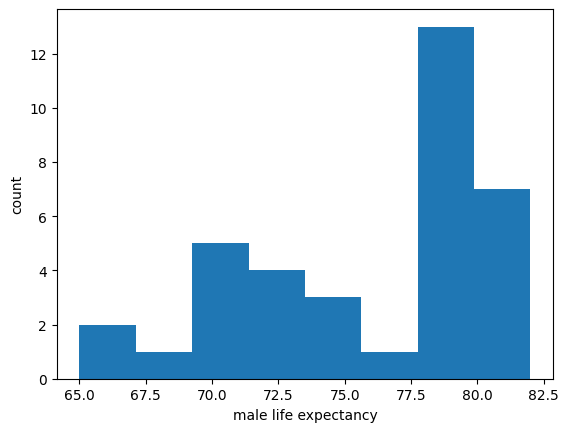

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# uses seaborn to adjust font size; sometimes not necessary, but 1.2 is a good default
# sns.set(font_scale=1.2)

# set the bins based on the range of the feature of interest
bins = np.linspace(65, 82, 9)

# use matplotlib to make the histogram
plt.hist(df_EUpop['male_life_expectancy'], bins=bins)
plt.xlabel('male life expectancy')
plt.ylabel('count')

# the below will save the histogram as a .pdf file in your directory
f = 'EU_male_life_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')

Text(0, 0.5, 'density')

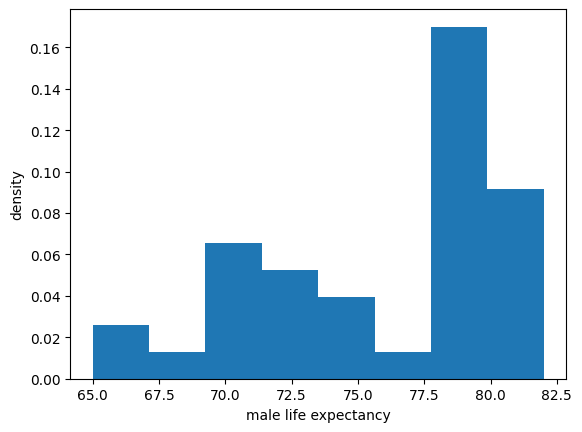

In [41]:
# change the y-axis to represent the density (so that the sum of all columns is 1)
plt.hist(df_EUpop['male_life_expectancy'], bins=bins, density=True)
plt.xlabel('male life expectancy')
plt.ylabel('density')

### Using Plotly

While matplotlib is one of the standard plotting packages, I would like you to become more familiar with plotly express, which is fairly simple to use and can create embeddable html plots (for use in your project).

Here is the same histogram, created using plotly (you can check out the docs for all the various options [here](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html)):

In [63]:
import numpy as np
import plotly.express as px
import pandas as pd

bins = np.linspace(65, 82, 9)

px.histogram(
    df_EUpop,
    x='male_life_expectancy',
    nbins=len(bins),
    histnorm='probability density',
    labels={'male_life_expectancy': 'Male Life Expectancy'}
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'histnorm': 'probability density',
              'hovertemplate': 'Male Life Expectancy=%{x}<br>probability density=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'nbinsx': 9,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': {'bdata': ('mpmZmZm5U0BmZmZmZqZTQM3MzMzMzF' ... 'mZmZnZUUAzMzMzM3NTQM3MzMzM7FNA'),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Male Life Expectancy'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'probability density'}}}
})

# Subplots
Subplots are useful for showing multiple views of the data side by side.

goal: show relationship between `male_life_expectancy` as `region` varies, using plotly.

In [43]:
# You could make an individual plot for a region
# let's do Western Europe
bool_weu = df_EUpop['region'] == 'Western Europe'
df_weu = df_EUpop.loc[bool_weu, :]

fig = px.histogram(
    df_weu,
    x='male_life_expectancy',
    nbins=len(bins) - 1,
    histnorm='probability density',
    labels={'male_life_expectancy': 'Male Life Expectancy (Western EU)'},
    range_x=[65, 82],
    range_y=[0,1]
)

fig.update_layout(
    title_text='Male Life Expectancy (Western EU)',
    xaxis_title='male life expectancy',
    yaxis_title='density')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'histnorm': 'probability density',
              'hovertemplate': ('Male Life Expectancy (Western ' ... 'ty density=%{y}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'nbinsx': 8,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': {'bdata': ('mpmZmZm5U0BmZmZmZqZTQM3MzMzMzF' ... 'mZ2VNAMzMzMzPzU0BmZmZmZkZUQA=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'Male Life Expectancy (Western EU)'},
               'xaxis': {'anchor': 'y',
                         'domain': [0.0, 1.0],
                         'range': [65, 82],
                         'title': {'text': 'male life expectancy'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'range': [0, 1], 'title': {'text': 'density'}}}
})

In [44]:
# now all of the regions
# No need to subset the data; plotly allows for "facet_col"
fig = px.histogram(
    df_EUpop,
    x='male_life_expectancy',
    nbins=len(bins) - 1,
    facet_col='region',
    facet_col_wrap=2,
    labels={'male_life_expectancy': 'Male Life Expectancy'},
    category_orders={'region': sorted(df_EUpop['region'].unique())},
    range_y=[0, 5]
)

fig.update_layout(
    height=600,
    width=1000,
    title_text='Male Life Expectancy by Region',
    margin=dict(t=80),
    showlegend=False
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'region=Eastern Europe<br>Male Life Expectancy=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'nbinsx': 8,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': {'bdata': ('MzMzMzNTUUCamZmZmXlRQDMzMzMz01' ... 'AAAKBQQAAAAAAAYFJAmpmZmZmZUEA='),
                    'dtype': 'f8'},
              'xaxis': 'x3',
              'yaxis': 'y3'},
             {'bingroup': 'x',
              'hovertemplate': 'region=Northern Europe<br>Male Life Expectancy=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'nbinsx': 8,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': {'bdata': ('ZmZmZmbmU0DNzMzMzIxSQJqZmZmZ2V' ... 'ZmZmZUQM3MzMzMLFRAAAAAAADAU0A='),
                    'dtype': 'f8'},
              'xaxis': 'x4',
              'yaxis': 'y4'},
             {'bingroup': 'x',
              'hovertemplate': 'region=Southern Europe<br>Male Life Expectancy=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'nbinsx': 8,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': {'bdata': ('zczMzMxMU0BmZmZmZqZTQDMzMzMzM1' ... 'mZ2VFAMzMzMzNzU0DNzMzMzOxTQA=='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'yaxis': 'y'},
             {'bingroup': 'x',
              'hovertemplate': 'region=Western Europe<br>Male Life Expectancy=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'nbinsx': 8,
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': {'bdata': ('mpmZmZm5U0BmZmZmZqZTQM3MzMzMzF' ... 'mZ2VNAMzMzMzPzU0BmZmZmZkZUQA=='),
                    'dtype': 'f8'},
              'xaxis': 'x2',
              'yaxis': 'y2'}],
    'layout': {'annotations': [{'font': {},
                                'showarrow': False,
                                'text': 'region=Southern Europe',
                                'x': 0.245,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 0.46499999999999997,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {},
                                'showarrow': False,
                                'text': 'region=Western Europe',
                                'x': 0.755,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 0.46499999999999997,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {},
                                'showarrow': False,
                                'text': 'region=Eastern Europe',
                                'x': 0.245,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 0.9999999999999999,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {},
                                'showarrow': False,
                                'text': 'region=Northern Europe',
        

## Scatter plots

What is the relationship between `birth_rate` and `death_rate` in:
1. `Eastern Europe`
1. `Northern Europe`

Using plotly express:
- `px.scatter`
- `opacity` (this is the `alpha` option in matplotlib)
- multiple scatters on same plot
- legend
- log scale

In [45]:
# simple scatter example
x = [1, 2, 3]
y = [1, 4, 9]
px.scatter(x, y)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>index=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'h',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': 'AQQJ', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': 'AAEC', 'dtype': 'i1'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'index'}}}
})

In [64]:
# select only rows corresponding to given region
bool_eeu = df_EUpop['region'] == 'Eastern Europe'
df_eeu = df_EUpop.loc[bool_eeu, :]

# scatter
fig = px.scatter(df_eeu, x='birth_rate', y='death_rate', opacity=.5)

# label
fig.update_layout(
    title_text='births and deaths in Eastern Europe',
    xaxis_title='birth rate',
    yaxis_title='death rate')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'birth_rate=%{x}<br>death_rate=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'opacity': 0.5, 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('mpmZmZmZIkAAAAAAAAAhQJqZmZmZmS' ... 'mZmZkjQM3MzMzMzCRAMzMzMzMzH0A='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAKkAAAAAAAAAyQDMzMzMzMy' ... 'MzMzMtQJqZmZmZmSVAzczMzMzML0A='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'births and deaths in Eastern Europe'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'birth rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'death rate'}}}
})

In [47]:
two_regions = ['Eastern Europe', 
               'Northern Europe']

df_subset = df_EUpop[df_EUpop['region'].isin(two_regions)]

# Can include labels inside the function itself to make things cleaner
# And, can add hover_data
fig = px.scatter(
    df_subset,
    x='birth_rate',
    y='death_rate',
    color='region',
    opacity=0.5,
    labels={'birth_rate': 'Birth Rate', 'death_rate': 'Death Rate'},
    title='Comparing Relationship of Births and Deaths in Europe',
    hover_data=['country_name']
)

fig.update_layout(
    width=800,
    height=600
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([['Belarus'],
                                   ['Bulgaria'],
                                   ['Czechia'],
                                   ['Hungary'],
                                   ['Moldova'],
                                   ['Poland'],
                                   ['Romania'],
                                   ['Russia'],
                                   ['Slovakia'],
                                   ['Ukraine']], dtype=object),
              'hovertemplate': ('region=Eastern Europe<br>Birth' ... '{customdata[0]}<extra></extra>'),
              'legendgroup': 'Eastern Europe',
              'marker': {'color': '#636efa', 'opacity': 0.5, 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Eastern Europe',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('mpmZmZmZIkAAAAAAAAAhQJqZmZmZmS' ... 'mZmZkjQM3MzMzMzCRAMzMzMzMzH0A='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAKkAAAAAAAAAyQDMzMzMzMy' ... 'MzMzMtQJqZmZmZmSVAzczMzMzML0A='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'customdata': array([['Denmark'],
                                   ['Estonia'],
                                   ['Finland'],
                                   ['Iceland'],
                                   ['Ireland'],
                                   ['Latvia'],
                                   ['Lithuania'],
                                   ['Norway'],
                                   ['Sweden'],
                                   ['United Kingdom']], dtype=object),
              'hovertemplate': ('region=Northern Europe<br>Birt' ... '{customdata[0]}<extra></extra>'),
              'legendgroup': 'Northern Europe',
              'marker': {'color': '#EF553B', 'opacity': 0.5, 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Northern Europe',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': {'bdata': ('zczMzMzMJEDNzMzMzMwjQM3MzMzMzC' ... 'mZmZkjQM3MzMzMzCVAZmZmZmZmJEA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'y': {'bdata': ('zczMzMzMIkDNzMzMzMwnQAAAAAAAAC' ... 'AAAAAeQAAAAAAAACNAzczMzMzMJEA='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'height': 600,
               'legend': {'title': {'text': 'region'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Comparing Relationship of Births and Deaths in Europe'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Birth Rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Death Rate'}}}
})

## Saving a Plotly Figure
* html is a great format to share your *interactive* plot

In [48]:
import plotly

plotly.offline.plot(fig, filename='birth_death_EU.html');

# Line Plots

Often used for temporal plots (i.e. what is the trend over time).

For example, how have emigration numbers from Romania changed over time? ([source](https://www.kaggle.com/datasets/gpreda/emigrants-from-romania-19912020))

Using matplotlib (as on the homework):

- `plt.plot()` (line plot)
- line style (width, color, dot/dash)
- label & legend
- `fill_between()`

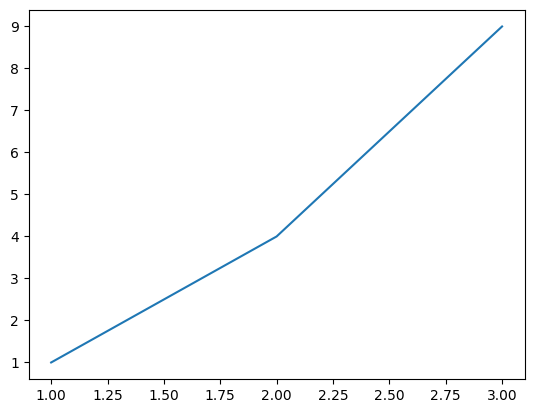

In [49]:
# simple line plot example
x = [1, 2, 3]
y = [1, 4, 9]
plt.plot(x, y)

In [50]:
df_roman = pd.read_csv('emigrants_romania.csv')
total_bool = (df_roman.geo == ' TOTAL') & (df_roman.sex == 'T')
df_roman_tot = df_roman.loc[total_bool,:]
df_roman_tot

,sex,geo,year,unit,total
0,T,TOTAL,1990,NR,96929
1,T,TOTAL,1991,NR,44160
2,T,TOTAL,1992,NR,31152
3,T,TOTAL,1993,NR,18446
4,T,TOTAL,1994,NR,17146
5,T,TOTAL,1995,NR,25675
6,T,TOTAL,1996,NR,21526
7,T,TOTAL,1997,NR,19945
8,T,TOTAL,1998,NR,17536
9,T,TOTAL,1999,NR,12594


In [51]:
# can look at the unique dates in the data set
# df_roman.year.unique()

# unfortunately, these are strings right now, not dates
# use .to_datetime from pandas to convert a string column to a date (pay attention to format of dates)
df_roman_tot.loc[:,'year'] = pd.to_datetime(df_roman_tot.loc[:,'year'], format = '%Y')
df_roman_tot.head()

,sex,geo,year,unit,total
0,T,TOTAL,1990-01-01,NR,96929
1,T,TOTAL,1991-01-01,NR,44160
2,T,TOTAL,1992-01-01,NR,31152
3,T,TOTAL,1993-01-01,NR,18446
4,T,TOTAL,1994-01-01,NR,17146


In [1]:
# linestyle ':' dotted, '--' dashed, '-.' mixed, '-' solid
plt.plot(df_roman_tot.year, df_roman_tot.total,
        color='blue', linewidth=1, linestyle='--')
plt.xlabel('year')
plt.ylabel('emigration total')
plt.suptitle('emigration from Romania over time');

NameError: name 'plt' is not defined

## `plt.fill_between()`

Shades between two line plots.  Great for showing how the data is distributed around its mean.

(Also, **VERY** important for the homework...)

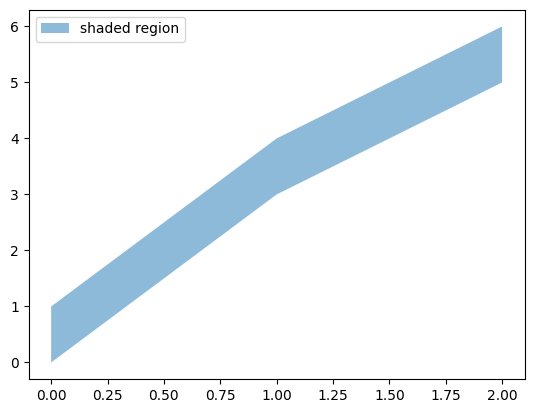

In [53]:
# simple fill between example
x = [0, 1, 2]
top = [1, 4, 6]
btm = [0, 3, 5]
plt.fill_between(x, top, btm, alpha=.5, label='shaded region')
plt.legend()

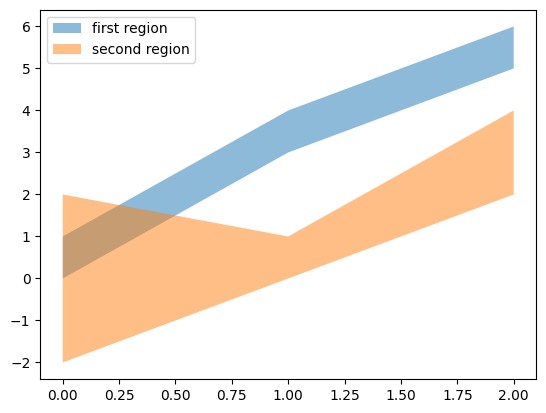

In [54]:
# slightly more complex example
x = [0, 1, 2]
regions = pd.Series({'top1': [1, 4, 6],
                    'top2': [2, 1, 4],
                    'btm1': [0, 3, 5],
                    'btm2': [-2, 0, 2]})
labels = ['first region', 'second region']

for area in range(2):
    plt.fill_between(x, regions[area], regions[area+2], alpha = .5, label = labels[area])

plt.legend()

## Plotly does line plots too

What about the difference in Male and Female emigration from Romania over time?

In [55]:
df_roman = pd.read_csv('emigrants_romania.csv')
nototal_bool = (df_roman.geo == ' TOTAL') & (df_roman.sex != 'T')
df_roman_notot = df_roman.loc[nototal_bool,:]

df_roman_notot.loc[:,'year'] = pd.to_datetime(df_roman_notot.loc[:,'year'], format = '%Y')
df_roman_notot.head()

,sex,geo,year,unit,total
1705,M,TOTAL,1990-01-01,NR,46335
1706,M,TOTAL,1991-01-01,NR,21211
1707,M,TOTAL,1992-01-01,NR,16085
1708,M,TOTAL,1993-01-01,NR,8751
1709,M,TOTAL,1994-01-01,NR,7886


In [56]:
px.line(data_frame=df_roman_notot, x='year', y='total', color='sex')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'sex=M<br>year=%{x}<br>total=%{y}<extra></extra>',
              'legendgroup': 'M',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'M',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
                          '1992-01-01T00:00:00.000000000', '1993-01-01T00:00:00.000000000',
                          '1994-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
                          '1996-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
                          '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
                          '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
                          '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
                          '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
                          '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
                          '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
                          '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
                          '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
                          '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
                          '2016-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
                          '2018-01-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
                          '2020-01-01T00:00:00.000000000'], dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('/7QAANtSAADVPgAALyIAAM4eAADWLA' ... 'AXJwAA1icAANUuAABhLgAAiiUAAA=='),
                    'dtype': 'i4'},
              'yaxis': 'y'},
             {'hovertemplate': 'sex=F<br>year=%{x}<br>total=%{y}<extra></extra>',
              'legendgroup': 'F',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'F',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array(['1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
                          '1992-01-01T00:00:00.000000000', '1993-01-01T00:00:00.000000000',
                          '1994-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
                          '1996-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
                          '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
                          '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
                          '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
                          '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
                          '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
                          '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
                          '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
                          '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
                          '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
                          '2016-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
                          '2018-01-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
                          '2020-01-01T00:00:00.000000000'], dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('osUAAKVZAADbOgAA3yUAACwkAAB1Nw' ... 'AAMgAA

## Tip: Shop around for just the right graph

Seaborn has some more niche graphs which are fantastic for specific applications.  While we won't cover the syntax on each of these, you'll find they're similar to what we've already covered.

Take a few minutes outside of class to browse these graphs to see whats out there:

[https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html)

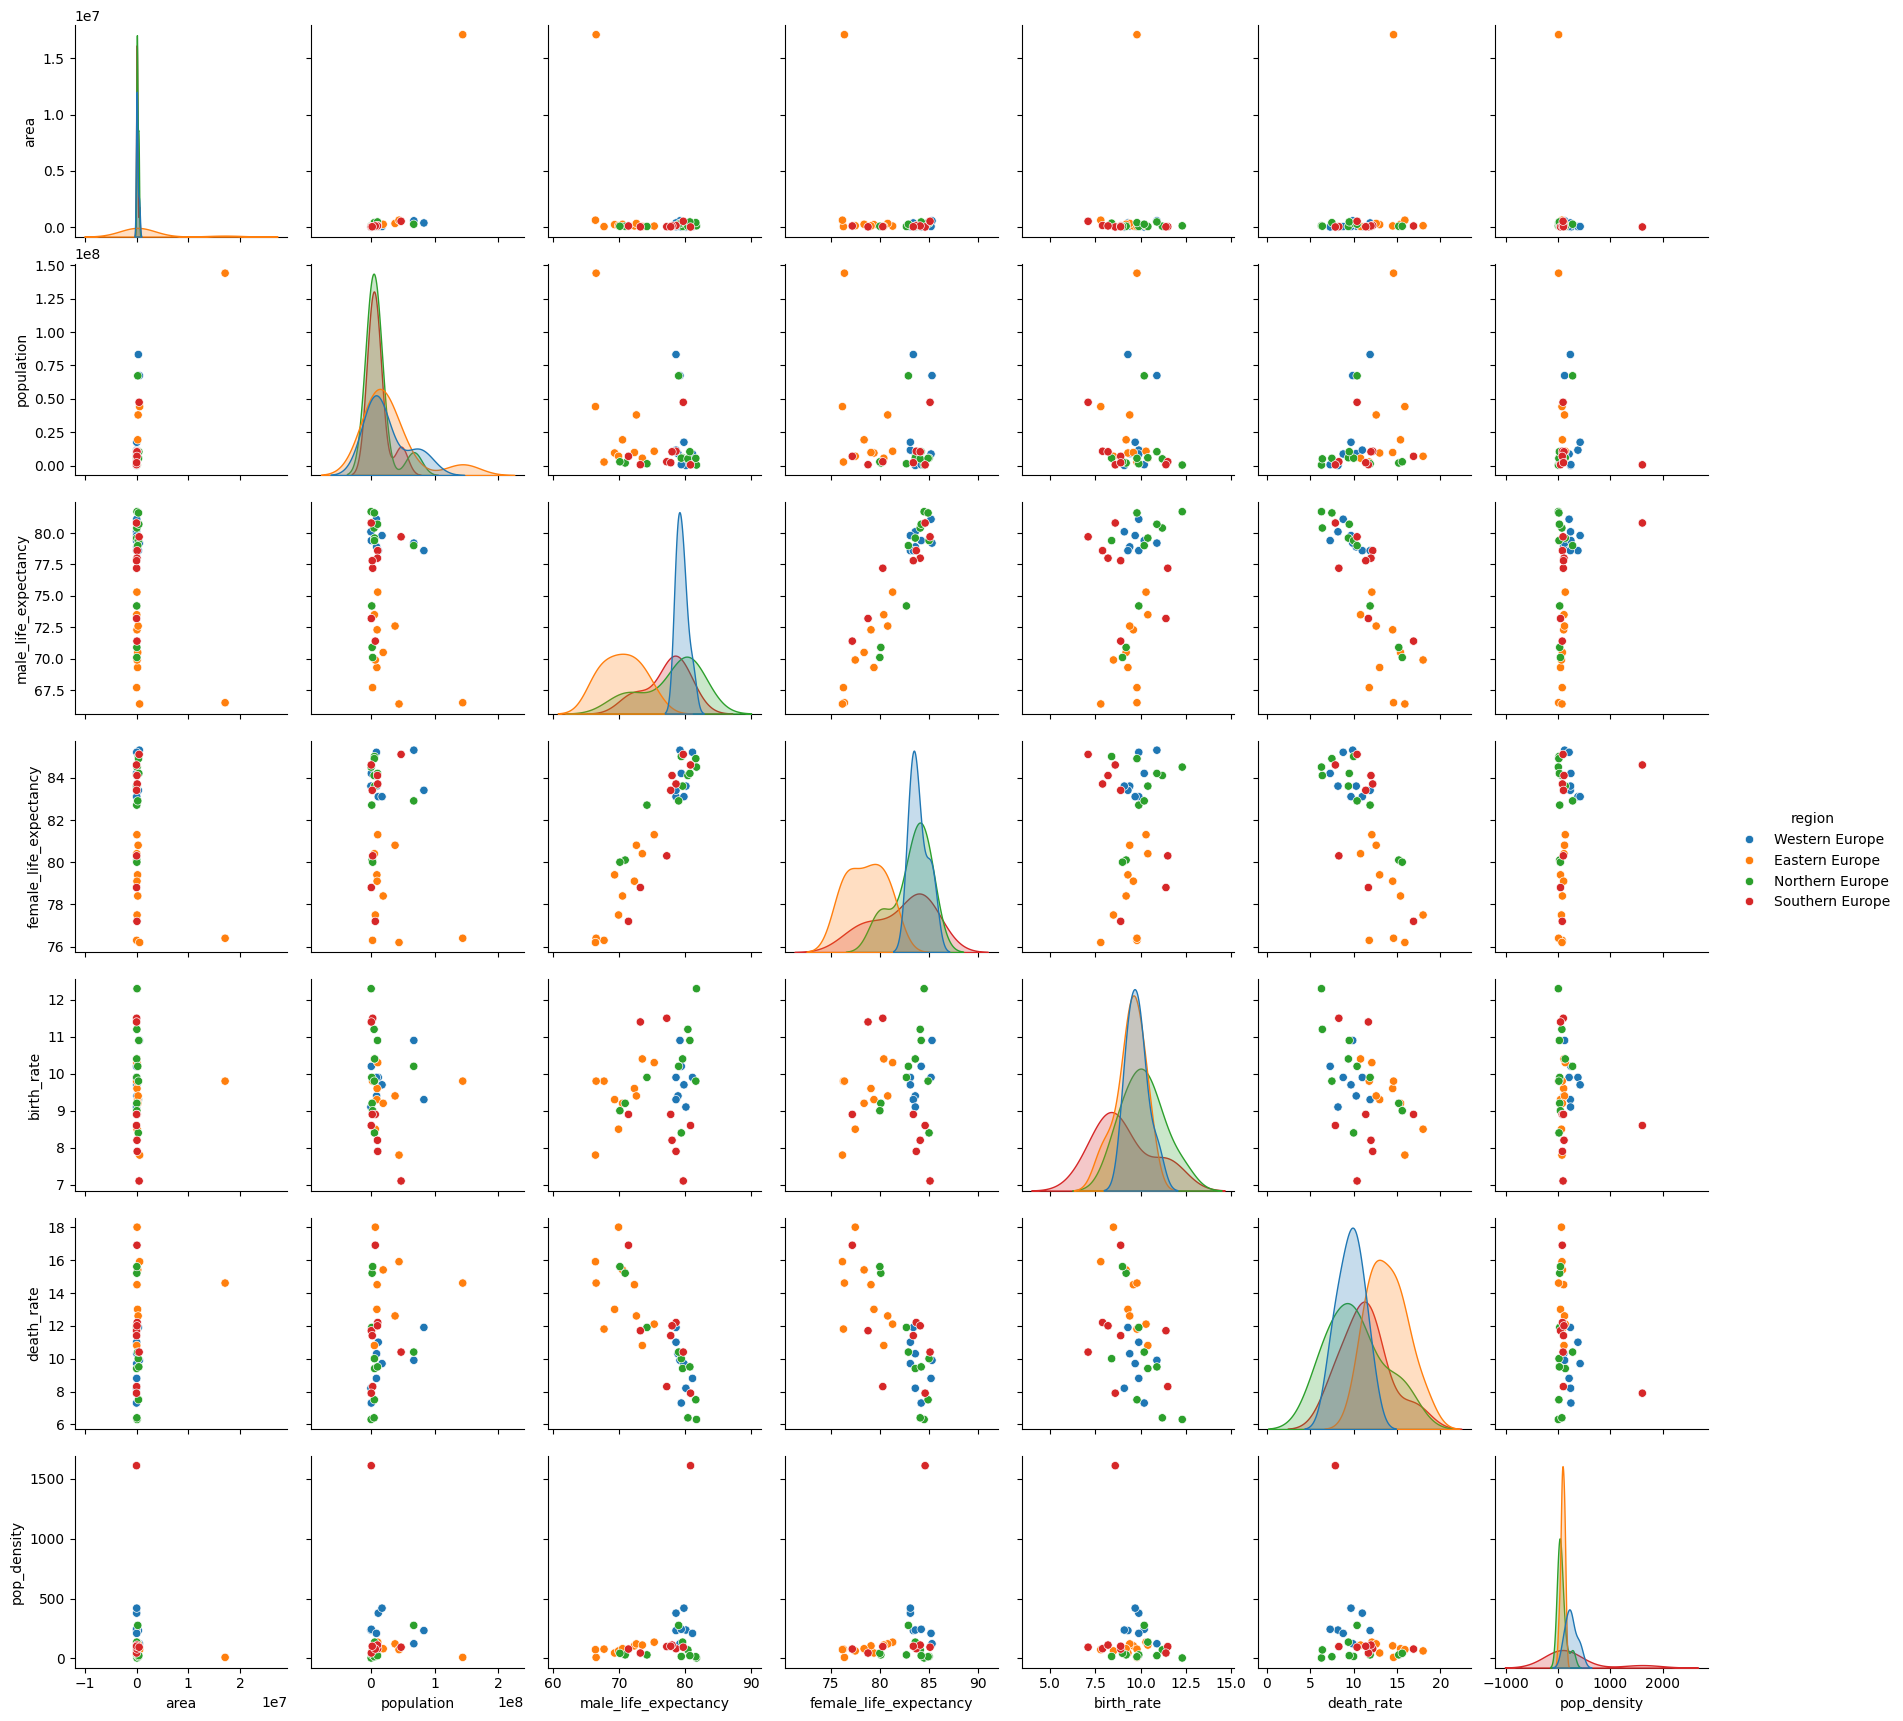

In [65]:
sns.pairplot(df_EUpop, hue='region')

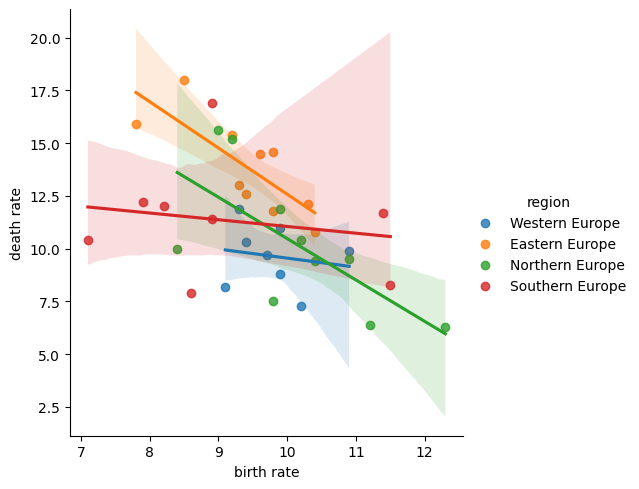

In [58]:
# Plot death rate as a function of birth rate by region
g = sns.lmplot(
    data=df_EUpop,
    x="birth_rate", y="death_rate", hue="region",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("birth rate", "death rate")

## Cleaning Data before Numerical Summaries (or, more specific Data Cleaning tools)

Before we can truly begin discussing calculating numerical summaries of our data, we need to make sure our data are clean! Missing values, incorrect values, etc. These can all cause issues in calculating the basic statistics we use to summarize data.

## Cleaning Data Speed Run (Depending on time constraints, we may skip some things)

### DataFrame Manipulations

- Missing values (NaN)
    - why they're there
    - what to do with them
        - discard data
        - fill all missing values in with something reasonable

## Missing Data

* Pandas automatically assigns **NaN**, "Not a Number", to missing values while reading a file
* some folks use other values to indicate a "missing" value
    - `-99` is popular, for some reason ...
    - use `na_values` argument of `read_csv()` to mark other values as **NaN**

In [59]:
# reminder that the recipe data frame had some missing data

# some aesthetic cleaning
# use .rename to make all the column names lower case
# we can also pass a function which operates on each index / column
def make_lower(x):
    return str(x).lower()
big_df_recipe.rename(make_lower, axis = 1, inplace=True)

big_df_recipe.head()

,name,href,total fat,saturated fat,cholesterol,sodium,total carbohydrate,dietary fiber,total sugars,protein,vitamin c,calcium,iron,potassium,query
0,Creamy Strawberry Crepes,https://www.allrecipes.com/recipe/143886/cream...,37.0,22.0,205.0,406.0,49.0,3.0,32.0,10.0,62.0,115.0,2.0,319.0,crepes
1,Vanilla Crepes,https://www.allrecipes.com/recipe/95817/vanill...,7.0,4.0,66.0,146.0,16.0,0.0,4.0,3.0,0.0,45.0,1.0,72.0,crepes
2,Banana Crepes,https://www.allrecipes.com/recipe/25216/banana...,29.0,17.0,146.0,252.0,61.0,4.0,31.0,8.0,11.0,110.0,2.0,583.0,crepes
3,Egg-White Crepes,https://www.allrecipes.com/recipe/141970/egg-w...,8.0,1.0,1.0,83.0,33.0,5.0,10.0,10.0,NaN,89.0,1.0,272.0,crepes
4,Claire's Yummy Crepes,https://www.allrecipes.com/recipe/20743/claire...,4.0,2.0,69.0,251.0,36.0,1.0,5.0,9.0,0.0,110.0,2.0,189.0,crepes


Notice that `vitamin c` is missing for Egg-White Crepes, and that pandas uses default NaN. Sometimes your missing data is in a different format, however:

In [60]:
# what about data with som eother way of identifying missing data?
# notice also a new read_ function
df_miss = pd.read_excel('miss_data.xlsx')
df_miss

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
df_miss = pd.read_excel('miss_data.xlsx', index_col = 'patient', na_values = ('miss'))
df_miss

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
i,158.0,80.0,28,NaN,38.0,34,39.0,NaN


### What to do with missing data?

* Option 0: Nothing (we've done this)
* Option 1: Discard all rows which are missing data (we've done this!)
* Option 2: Fill in missing data with reasonble guesses (impute; we haven't done this....)

### What to do with missing data?
* Option 0: Nothing
    - When the `skipna=True`, we ignore NaN in our averaging
    - other pandas methods, besides `DataFrame.mean()`, have `skipna` too

In [ ]:
# mean of each column (skip any NaN values, the default)
df_miss.mean(axis=0, skipna=True)

height        167.750000
weight         72.250000
trial0         38.300000
trial1         41.833333
trial2         37.142857
trial3         36.300000
trial4         42.500000
finaltrial           NaN
dtype: float64

In [ ]:
# mean of each column (dont skip any NaN values)
df_miss.mean(axis=0, skipna=False)

height         NaN
weight         NaN
trial0        38.3
trial1         NaN
trial2         NaN
trial3        36.3
trial4         NaN
finaltrial     NaN
dtype: float64

### What to do with missing data?

* Option 1: Discard all rows / columns which have missing data
    - appropriate when we have other data which contains similar information as discarded rows
    - `DataFrame.dropna()`: drop all rows or columns with missing data
        - axis
        - how: 'any', 'all' (do we drop row / column if ...
            - 'any' of its values are nan
            - 'all' of its values are nan

In [ ]:
# drop rows with any nan values (default) ... nothing left
df_miss.dropna(axis=0, how='any')

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,


In [ ]:
# drop columns with all nan values (unlikely, but possible)
df_miss.dropna(axis=1, how='all')

,height,weight,trial0,trial1,trial2,trial3,trial4
patient,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0
b,164.0,67.0,47,49.0,43.0,48,NaN
c,NaN,NaN,42,NaN,46.0,47,42.0
d,NaN,NaN,23,NaN,NaN,17,NaN
e,199.0,89.0,38,40.0,44.0,48,NaN
f,134.0,54.0,34,36.0,29.0,22,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0
h,175.0,72.0,43,37.0,35.0,31,NaN
i,158.0,80.0,28,NaN,38.0,34,39.0


In [ ]:
# drop row if it does not have at least three values that are **not** NaN
df_miss.dropna(thresh=3)
#df_miss.dropna(thresh=4)

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
i,158.0,80.0,28,NaN,38.0,34,39.0,NaN
j,169.0,79.0,33,NaN,25.0,28,NaN,NaN


In [ ]:
# drop only if NaN in specific column
df_miss.dropna(subset=['trial4'])

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
i,158.0,80.0,28,NaN,38.0,34,39.0,NaN


### What to do with missing data?

* Option 2: Fill in missing data
    - appropriate when we don't have much data, let's not waste any!
    - some known value
        - `DataFrame.fillna(value)`
    - some average value
        - `DataFrame.interpolate(method='zero')

In [ ]:
# if the trial is missing, let us assume they deserve a 0
df_miss.fillna(0)

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,0.0,42,40.0,0.0
b,164.0,67.0,47,49.0,43.0,48,0.0,0.0
c,0.0,0.0,42,0.0,46.0,47,42.0,0.0
d,0.0,0.0,23,0.0,0.0,17,0.0,0.0
e,199.0,89.0,38,40.0,44.0,48,0.0,0.0
f,134.0,54.0,34,36.0,29.0,22,0.0,0.0
g,163.0,59.0,50,50.0,0.0,46,49.0,0.0
h,175.0,72.0,43,37.0,35.0,31,0.0,0.0
i,158.0,80.0,28,0.0,38.0,34,39.0,0.0


### Filling In a Different Value for Each Column

* Sometimes (as with height and weight) it doesn't make sense to give same value to everything
* Can fill in each column with a different value
* Pass in a dictionary containing column names as keys and desired NA values as values
    * **fillna(dictionary_of_values)**
    
    

In [ ]:
dict_fill = {'height': 170,
             'weight': 70,
             'trial0': 50,
             'trial1': 45,
             'trial2': 40,
             'trial3': 35,
             'trial4': 30,
             'finaltrial': 25}
df_miss.fillna(dict_fill)

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,40.0,42,40.0,25.0
b,164.0,67.0,47,49.0,43.0,48,30.0,25.0
c,170.0,70.0,42,45.0,46.0,47,42.0,25.0
d,170.0,70.0,23,45.0,40.0,17,30.0,25.0
e,199.0,89.0,38,40.0,44.0,48,30.0,25.0
f,134.0,54.0,34,36.0,29.0,22,30.0,25.0
g,163.0,59.0,50,50.0,40.0,46,49.0,25.0
h,175.0,72.0,43,37.0,35.0,31,30.0,25.0
i,158.0,80.0,28,45.0,38.0,34,39.0,25.0


### Interpolation

https://en.wikipedia.org/wiki/2020_UK_GCSE_and_A-Level_grading_controversy

Because of the pandemic and the impossibility of organizing exams students got their imputed grades rather than take an exam.

How to implement that? We can fill in missing values with the average of the other row values

**But also, if you ever become a teacher, please don't do that to students.**

In [ ]:
# Step 1: fill missing trials (not height or weight, or finaltrial) with 0
df_miss.fillna(value={'trial0': 0, 'trial1': 0, 'trial2': 0, 'trial3': 0, 'trial4': 0}, inplace=True)
df_miss

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,0.0,42,40.0,NaN
b,164.0,67.0,47,49.0,43.0,48,0.0,NaN
c,NaN,NaN,42,0.0,46.0,47,42.0,NaN
d,NaN,NaN,23,0.0,0.0,17,0.0,NaN
e,199.0,89.0,38,40.0,44.0,48,0.0,NaN
f,134.0,54.0,34,36.0,29.0,22,0.0,NaN
g,163.0,59.0,50,50.0,0.0,46,49.0,NaN
h,175.0,72.0,43,37.0,35.0,31,0.0,NaN
i,158.0,80.0,28,0.0,38.0,34,39.0,NaN


In [ ]:
# Step 2: get the mean score from first five trials per patient
means = df_miss[['trial0', 'trial1', 'trial2', 'trial3', 'trial4']].mean(axis=1)
means

patient
a    33.2
b    37.4
c    35.4
d     8.0
e    34.0
f    24.2
g    39.0
h    29.2
i    27.8
j    17.2
dtype: float64

In [ ]:
# Step 3: Fill the missing values in finaltrial with the means
df_miss.fillna(value = {'finaltrial': means})

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,0.0,42,40.0,33.2
b,164.0,67.0,47,49.0,43.0,48,0.0,37.4
c,NaN,NaN,42,0.0,46.0,47,42.0,35.4
d,NaN,NaN,23,0.0,0.0,17,0.0,8.0
e,199.0,89.0,38,40.0,44.0,48,0.0,34.0
f,134.0,54.0,34,36.0,29.0,22,0.0,24.2
g,163.0,59.0,50,50.0,0.0,46,49.0,39.0
h,175.0,72.0,43,37.0,35.0,31,0.0,29.2
i,158.0,80.0,28,0.0,38.0,34,39.0,27.8


## Describing Sets of Numbers

- types of data
    - numeric vs categorical
    
- measures of central tendency (and when to use each)
    - mean
    - median
    - mode
     
- measures of dispersion
    - variance and standard deviation

## Types of Data

### Categorical Data
- categorical data need not be ordered
- examples:
    - favorite color of person 
        - green, blue, red, ...
    - which network discusses a stock most
        - cnn, fox, msnbc
    - type of weather in a given day
        - rainy, sunny, windy
    
### Numerical (continuous) data:
- data always has an order (ordered data)
    - for every pair of items x, y in the data either:
        - x < y
        - x > y
        - x = y
- between every pair of items, there is another item
- examples:
    - height of a person
        - 5'6", 5'10"
    - value of a stock
        - \\$123.45, \\$8
    - amount of rain in a day
        - 2", 0"

### Question
Are zip codes categorical or numerical data?

## Measures of Center for Numerical Data:

- Sample Mean
- Sample Median

## Sample Mean

**Sample Mean** of a population is the arithmetic average:
$$ \bar{x} = \frac{1}{N} \sum_i x_i $$
(add all entries together and divide by number of entries)

In [ ]:
df_grades = pd.DataFrame({'quiz1': [6, 7, 8, 8, 6, 7, 7, 6, 8], 
                          'quiz2': [6, 5, 6, 10, 9, 5, 6, 10, 6]})
df_grades

,quiz1,quiz2
0,6,6
1,7,5
2,8,6
3,8,10
4,6,9
5,7,5
6,7,6
7,6,10
8,8,6


In [ ]:
df_grades.mean()

quiz1    7.0
quiz2    7.0
dtype: float64

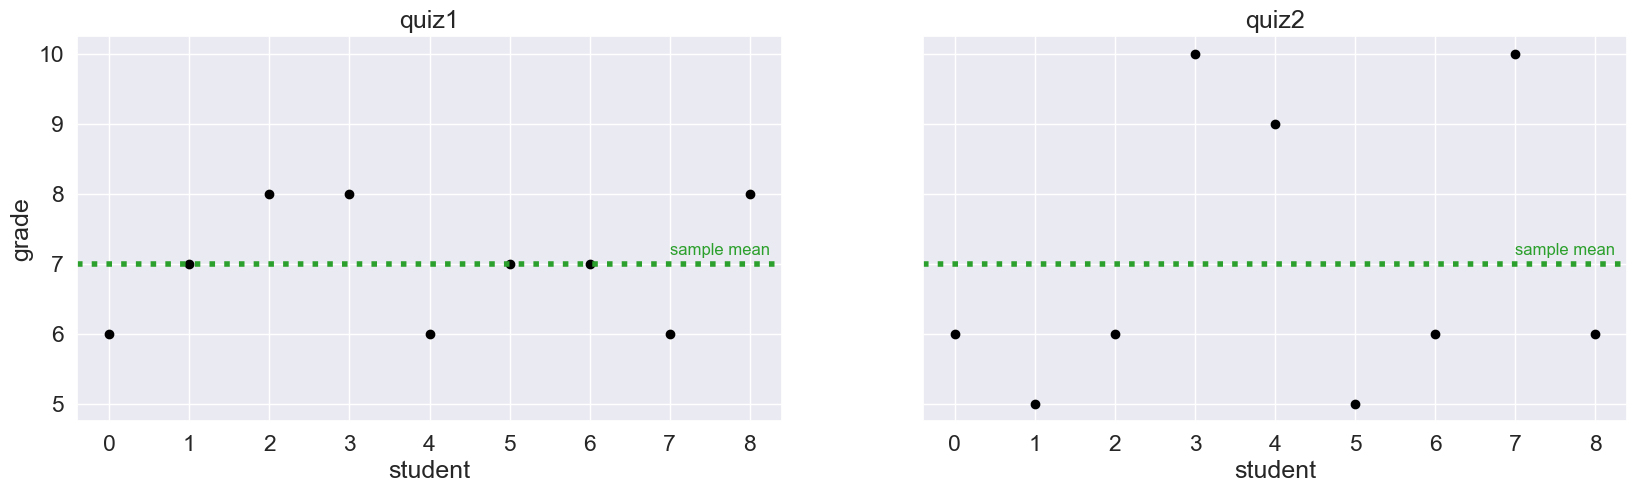

In [ ]:
sns.set(font_scale=1.5)

f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label], 'o', color='black')
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(True)
    ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
               ha='right', fontsize=12, color='tab:green')
axes[0].set_ylabel('grade')
f.set_size_inches(20, 5)

**Sample Median** is the "halfway" point (the 50th percentile) of a set of sorted values:
- half of the remaining data is greater than median
- half of the remaining data is less than  median

If a set of numbers has an even number of points then median is mean of middle most two points.

In [ ]:
df_grades.median()

quiz1    7.0
quiz2    6.0
dtype: float64

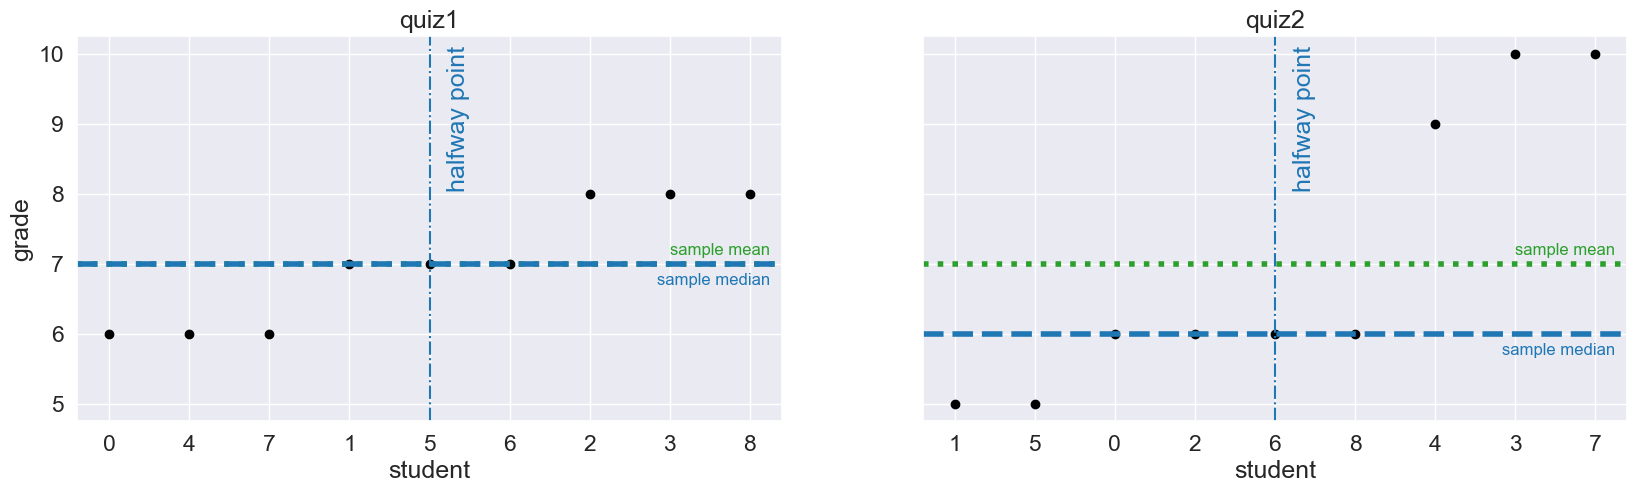

In [ ]:
f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label].sort_values().values, 'o', color='black')
    ax.set_xticks(range(0, len(df_grades)))
    ax.set_xticklabels(df_grades[label].sort_values().index)
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(True)
    ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
               ha='right', fontsize=12, color='tab:green')
    
    ax.axhline(df_grades[label].median(), color='tab:blue', ls='--', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].median()-.125), text='sample median',
               ha='right', fontsize=12, color='tab:blue', va='top')
    
    ax.annotate(xy = (.525, .975), color='tab:blue', xycoords='axes fraction', rotation=90, 
               text = 'halfway point', va='top', ha='left')
    
    ax.axvline((len(df_grades)-1)/2, ls='-.', color='tab:blue')
    
axes[0].set_ylabel('grade')
f.set_size_inches(20, 5)

Median is an attractive measure of center when:
- data is inconsistently distributed (e.g. log scaled data)
- data contains outliers
    **outlier:** a value which is atypically far from the average (datum are typically closer to the average)

## Measures of Spread for Numerical Data:

- Sample Variance
- Sample Standard Deviation
- Sample Quartiles

## Observations vs Ground Truth

    Fishing in a new pond, you catch fish which are 3 lbs and another which is 5 lbs.  
    What can (and can't) you say about the average fish weight in the pond?


- **Observed** data points can be collected from an experiment.
- The **Ground Truth** describes information which is absolutely true.  
    - we rarely know ground truth information about distributions
        - instead ... we estimate them
        
       
### Language (and notation) to distinguish between observations and ground truth:

| **Observed**                             | **Ground Truth**            |
|------------------------------------------|-----------------------------|
| Sample Mean $\bar{x}$                    | Expected Value $E[x], \mu$       |
| Sample Standard Deviation $\hat{\sigma}$ | Standard Deviation $\sigma$ |
| Sample Variance $\hat{\sigma^2}$         | Variance $\sigma^2$         |

(In DS practice, because almost all our data is observed, we rarely say "Sample Mean" and usually just say "Mean", and usually when folks just say "Standard Deviation" or "Variance" they mean the "Sample Standard Deviation" and "Sample Variance")
    

### Variance and Sample Variance
**Variance** is the average squared distance from the mean. 
$$ \sigma^2 = \frac{1}{N} \sum_i (x_i-\mu)^2 $$
where $\mu$ is the expected value of the distribution that $x_i$ came from.

Rarely do we know the distribution (or its mean $\mu$).  The best we can do is estimate this value as the **Sample Variance**:
$$ \hat{\sigma}^2 = \frac{1}{N-1} \sum_i (x_i-\bar{x})^2 $$
where $\bar{x}$ is the sample mean.  

**Note the $\frac{1}{N-1}$ term in Sample Variance (Bessel's Correction) differs from the $\frac{1}{N}$ term in Variance above.**

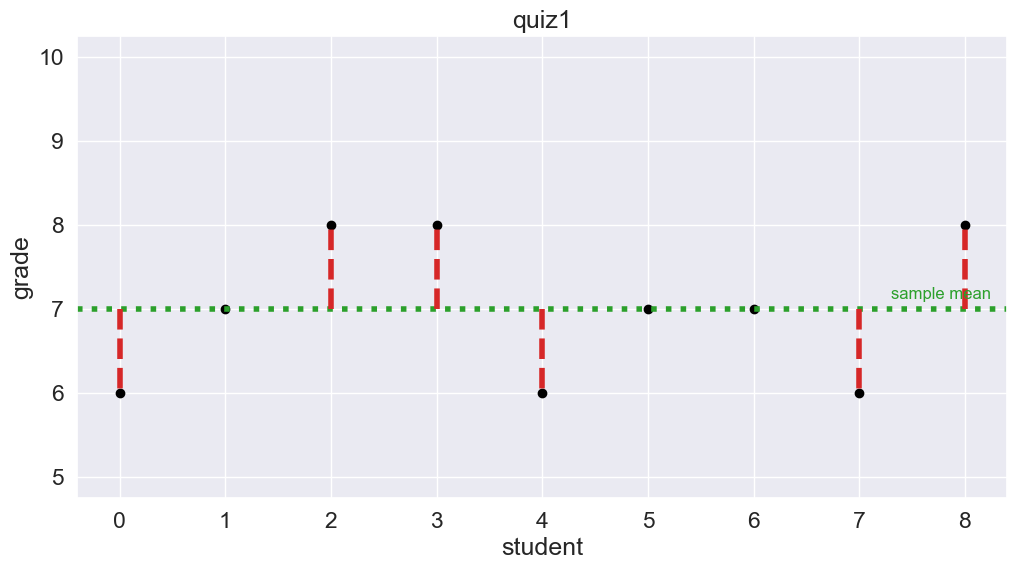

In [ ]:
f, ax = plt.subplots()
label='quiz1'
ax.plot(df_grades[label], 'o', color='black')
ax.set_title(label)
ax.set_xlabel('student')
ax.grid(True)
ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
           ha='right', fontsize=12, color='tab:green')
ax.set_ylim([4.75, 10.25])

for idx, el in enumerate(df_grades[label]):
    ax.plot([idx, idx], [df_grades[label].mean(), el], lw=4, ls='--', color='tab:red')

ax.set_ylabel('grade')
f.set_size_inches(12, 6)

Here we have six instances where the distance is 1 (and the square of distance is also 1). Sum that and divide by the number of students -1 (8) and we get $\frac{6}{8}=\frac{3}{4}$

In [ ]:
df_grades['quiz1'].var()

0.75

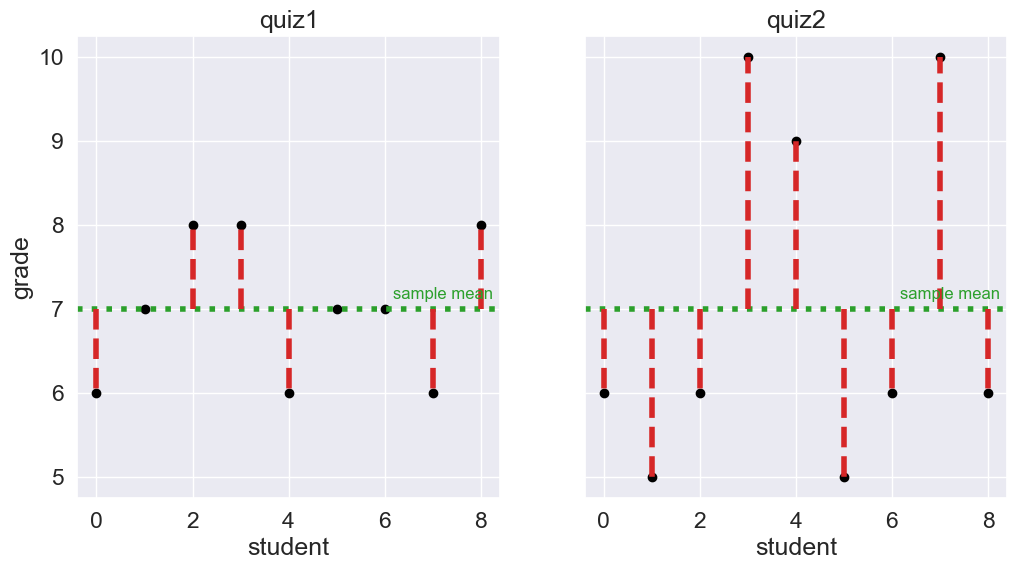

In [ ]:
f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label], 'o', color='black')
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(True)
    ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
               ha='right', fontsize=12, color='tab:green')
    ax.set_ylim([4.75, 10.25])

    for idx, el in enumerate(df_grades[label]):
        ax.plot([idx, idx], [df_grades[label].mean(), el], lw=4, ls='--', color='tab:red')

axes[0].set_ylabel('grade')
f.set_size_inches(12, 6)

In Quiz 2 we see that the sample mean is the same, but the distances from the mean are bigger:
$$ \hat{\sigma}^2 = \frac{1}{9-1} \cdot(1^2 + 2^2 + 1^2 + 3^2 + 2^2 + 2^2 + 1^2 + 3^2 + 1^2) = \frac{34}{8} = 4.25$$

In [ ]:
df_grades.var()

quiz1    0.75
quiz2    4.25
dtype: float64

Even though the average for the two quizes are the same it seems like the quizes were different:
* all the students found the first quiz similarly difficult.
* some students nailed the second quiz and some there were also some did quite poorly

### Standard deviation
Standard deviation is just the square root of the variance:

$$ \hat{\sigma} = \sqrt{\hat{\sigma}^2} = \sqrt{\frac{1}{N-1} \sum_i (x_i-\bar{x})^2} $$

#### Common misconception:
Wait, square root of average squared distance from mean ... isn't it just the average distance from mean?

No!
* square root of a sum does not equal the sum of square roots 

In [ ]:
# compute standard deviation
df_grades.std()

quiz1    0.866025
quiz2    2.061553
dtype: float64

In [ ]:
# compute square root of variances (same as std dev)
np.sqrt(df_grades.var())

quiz1    0.866025
quiz2    2.061553
dtype: float64

### Co-variance & correlation: Qualitatively
(How two values vary together)

The behavior between any two values x and y can be summarized in one of the three ways:
1. as x gets larger y typically gets larger too
    - ex: 
        - `x=temp on some day`
        - `y=number of people on the beach on the same day`
    - covariance & correlation is positive
2. as x gets larger y typically doesn't get larger or smaller
    - ex: 
        - `x=individual's favorite number`
        - `y=number of hot dogs that individual has eaten in their lifetime`
    - covariance & correlation is zero
3. as x gets larger, y typically gets smaller
    - ex: 
        - `x=average speed of driver on 10 mile commute`
        - `y=average commute time of driver on 10 mile commute`
    - covariance & correlation are negative

Covariance & Correlation are only defined between two values when the observations are somehow **linked**:
1. on the same **day**, we observe temp & beach population
1. on the same **individual**, we observe favortie number & hot dogs eaten
1. on the same **driver**, we observe speed and commute time

If we don't observe the data in pairs, correlation / covariance is not defined:
- `x=an individual's favorite number`
- `y=the temperature on a given day`

`x` is observed per individual while `y` is observed per day ... there isn't a way to "pair" every x with a y!

In [ ]:
df_EUpop.iloc[:, np.r_[4:11]].cov()

,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
area,8.000314e+12,6.313201e+13,-4.582980e+06,-2.597495e+06,4.074482e+04,1.622372e+06,-8.182096e+07
population,6.313201e+13,9.021667e+14,-3.023432e+07,-1.419289e+07,-2.844891e+06,1.829263e+07,-5.710219e+08
male_life_expectancy,-4.582980e+06,-3.023432e+07,2.230197e+01,1.283270e+01,1.187968e+00,-1.165654e+01,3.742888e+02
female_life_expectancy,-2.597495e+06,-1.419289e+07,1.283270e+01,8.319135e+00,3.013413e-01,-6.557841e+00,1.956119e+02
birth_rate,4.074482e+04,-2.844891e+06,1.187968e+00,3.013413e-01,1.231897e+00,-1.587397e+00,-4.224056e+01
death_rate,1.622372e+06,1.829263e+07,-1.165654e+01,-6.557841e+00,-1.587397e+00,8.813968e+00,-2.172171e+02
pop_density,-8.182096e+07,-5.710219e+08,3.742888e+02,1.956119e+02,-4.224056e+01,-2.172171e+02,7.177194e+04


## Computing Co-variance ("by hand")

**Sample covariance:**
$$ \texttt{cov}(x, y) = \frac{1}{N-1} \sum_i (x_i - \bar{x})(y_i - \bar{y})$$

Don't do this; we have computers, and covariance by itself is not very useful!

A covariance matrix contains the covariance of every pair of elements:
    
|   |         x |         y |
|--:|----------:|----------:|
| x | cov(x, x) | cov(x, y) |
| y | cov(y, x) | cov(y, y) |

- Note 1: cov(x, y) = cov(y, x) (always, not just in this example)
- Note 2: cov(x, x) is the variance of x and itself

In [ ]:
# variance diagonal of the covariance matrix
df_EUpop.iloc[:, np.r_[4:11]].var()

area                      8.000314e+12
population                9.021667e+14
male_life_expectancy      2.230197e+01
female_life_expectancy    8.319135e+00
birth_rate                1.231897e+00
death_rate                8.813968e+00
pop_density               7.177194e+04
dtype: float64

## Correlation (motivation)

Covariance by itself is not actually very useful, since the units are not (usually) interpretable. Instead, we usually use correlation.

Which has a more consistent relationship? (or maybe they're the same?)
- height of a person in `inches`
- height of a person in `cm`

or
- height of a person in `inches`
- height of a person in `feet`

In [ ]:
inch_to_cm = 2.54
inch_to_feet = 1/12

df_height = pd.DataFrame({'height_inches': [68, 69, 70, 72, 55, 77]})
df_height['height_cm'] = df_height['height_inches'] * inch_to_cm
df_height['height_feet'] = df_height['height_inches'] * inch_to_feet

df_height

,height_inches,height_cm,height_feet
0,68,172.72,5.666667
1,69,175.26,5.750000
2,70,177.80,5.833333
3,72,182.88,6.000000
4,55,139.70,4.583333
5,77,195.58,6.416667


In [ ]:
df_height.cov()

,height_inches,height_cm,height_feet
height_inches,53.900000,136.906000,4.491667
height_cm,136.906000,347.741240,11.408833
height_feet,4.491667,11.408833,0.374306


- Covariance between `height_inches` and `height_cm` ~= 136
- Covariance between `height_inches` and `height_feet` ~= 4

So is there a stronger relationship between `height_inches` and `height_cm`? ...

<Axes: xlabel='height_inches', ylabel='height_cm'>

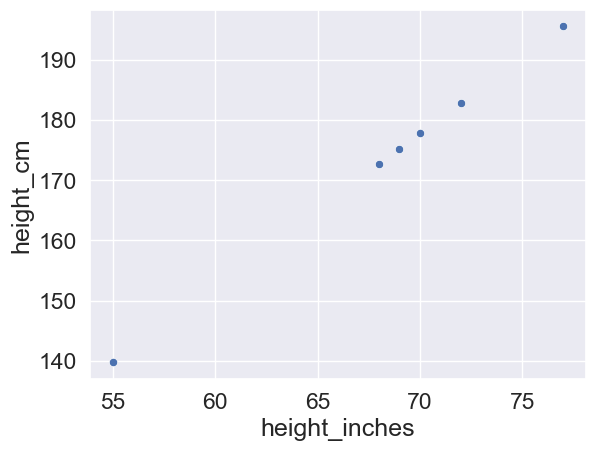

In [ ]:
sns.scatterplot(data=df_height, x='height_inches', y='height_cm')

<Axes: xlabel='height_inches', ylabel='height_feet'>

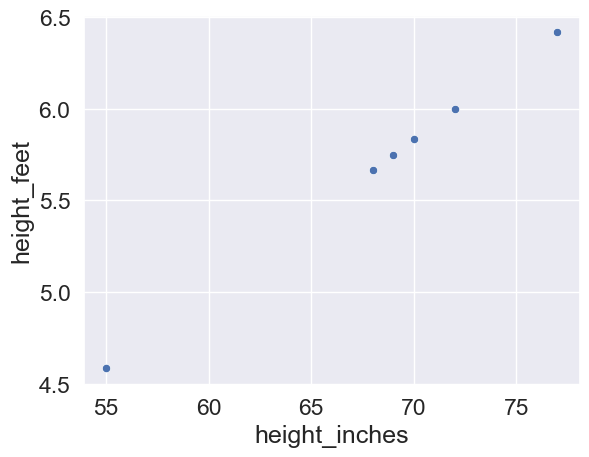

In [ ]:
sns.scatterplot(data=df_height, x='height_inches', y='height_feet')

So is there a stronger relationship between `height_inches` and `height_cm`? ...

... not at all, they have the *same* relationship.  Its just that covariance depends on the units we measure in.  Smaller units -> bigger values -> bigger covariance.

## The 'strongest' relationship between two variables

In some sense, this is the 'strongest' possible relationship.  When one variable increases, the other always does so too.  

**Helpful fact:**
The covariance is always smaller than the product of the standard deviations of both variables:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$

### Question: What does it mean that this is the 'strongest' possible relationship, and that the covariances are as large as they can possibly be?

In [ ]:
# compute the correlation matrix (each item is correlation of that row & column)
df_height.corr()

,height_inches,height_cm,height_feet
height_inches,1.0,1.0,1.0
height_cm,1.0,1.0,1.0
height_feet,1.0,1.0,1.0


## Correlation (Compute)

Remember, the biggest (and smallest) covariance we can possibly have is the product of the standard deviations:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$

Correlation: "How big of a covariance do you have comapred to how big it could possibly be?"

$$corr(x,y) = \frac{\texttt{cov}(x, y)}{\sigma_x \sigma_y} $$

In doing so, it removes any effect of the scale of the data might have (e.g. changing units).

In [ ]:
df_EUpop.iloc[:, np.r_[4:11]].corr()

,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
area,1.000000,0.743109,-0.343102,-0.318392,0.012979,0.193202,-0.107978
population,0.743109,1.000000,-0.213150,-0.163828,-0.085337,0.205138,-0.070963
male_life_expectancy,-0.343102,-0.213150,1.000000,0.942122,0.226645,-0.831404,0.295841
female_life_expectancy,-0.318392,-0.163828,0.942122,1.000000,0.094131,-0.765837,0.253151
birth_rate,0.012979,-0.085337,0.226645,0.094131,1.000000,-0.481740,-0.142058
death_rate,0.193202,0.205138,-0.831404,-0.765837,-0.481740,1.000000,-0.273106
pop_density,-0.107978,-0.070963,0.295841,0.253151,-0.142058,-0.273106,1.000000


## Let's discuss Correlation some more

Correlations are shown above each scatter (credit: wikipedia)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png" alt="Drawing" style="width: 800px;"/>

Common misconception:

- if x and y are independent, then they're uncorrelated
- if x and y are uncorrelated, they need not be uncorrelated
    - (see examples in last row directly above)

## The most important correlation/covariance slide: why did we go through all this trouble?

- mean describes where a feature typically is
- variance / standard deviation describes how consistently a feature stays near its mean
- correlation describes which relationship two values have:
    - when x increases, y typically increases
    - when x increases, y typically stays the same
    - when x increases, y typically decreases
    - **MOST IMPORTANTLY**: Just because two features have a correlation, **does not** mean they have anything to do with each other: [Spurious Correlations](http://www.tylervigen.com/spurious-correlations)

# Statistics as a language

Knowing the meaning of these statistics helps tell the story of the data (what it looks like, what relationships are in it, etc)

In [ ]:
df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
0,Austria,Europe,Western Europe,Vienna,83879,8917000,78.9,83.6,9.4,10.3,106.3
1,Belgium,Europe,Western Europe,Brussels,30530,11544000,78.6,83.1,9.9,11.0,378.1
2,France,Europe,Western Europe,Paris,549087,67380000,79.2,85.3,10.9,9.9,122.7
3,Germany,Europe,Western Europe,Berlin,357580,83161000,78.6,83.4,9.3,11.9,232.6
4,Liechtenstein,Europe,Western Europe,Vaduz,161,38137,80.1,83.6,9.1,8.2,236.9


In [ ]:
df_EUpop.iloc[:,6:11].mean()

male_life_expectancy       75.944444
female_life_expectancy     81.847222
birth_rate                  9.619444
death_rate                 11.355556
pop_density               156.413889
dtype: float64

In [ ]:
df_EUpop.iloc[:,6:11].cov()

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
male_life_expectancy,22.301968,12.832698,1.187968,-11.656540,374.288794
female_life_expectancy,12.832698,8.319135,0.301341,-6.557841,195.611897
birth_rate,1.187968,0.301341,1.231897,-1.587397,-42.240563
death_rate,-11.656540,-6.557841,-1.587397,8.813968,-217.217079
pop_density,374.288794,195.611897,-42.240563,-217.217079,71771.941230


In [ ]:
df_EUpop.iloc[:,6:11].corr()

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
male_life_expectancy,1.000000,0.942122,0.226645,-0.831404,0.295841
female_life_expectancy,0.942122,1.000000,0.094131,-0.765837,0.253151
birth_rate,0.226645,0.094131,1.000000,-0.481740,-0.142058
death_rate,-0.831404,-0.765837,-0.481740,1.000000,-0.273106
pop_density,0.295841,0.253151,-0.142058,-0.273106,1.000000


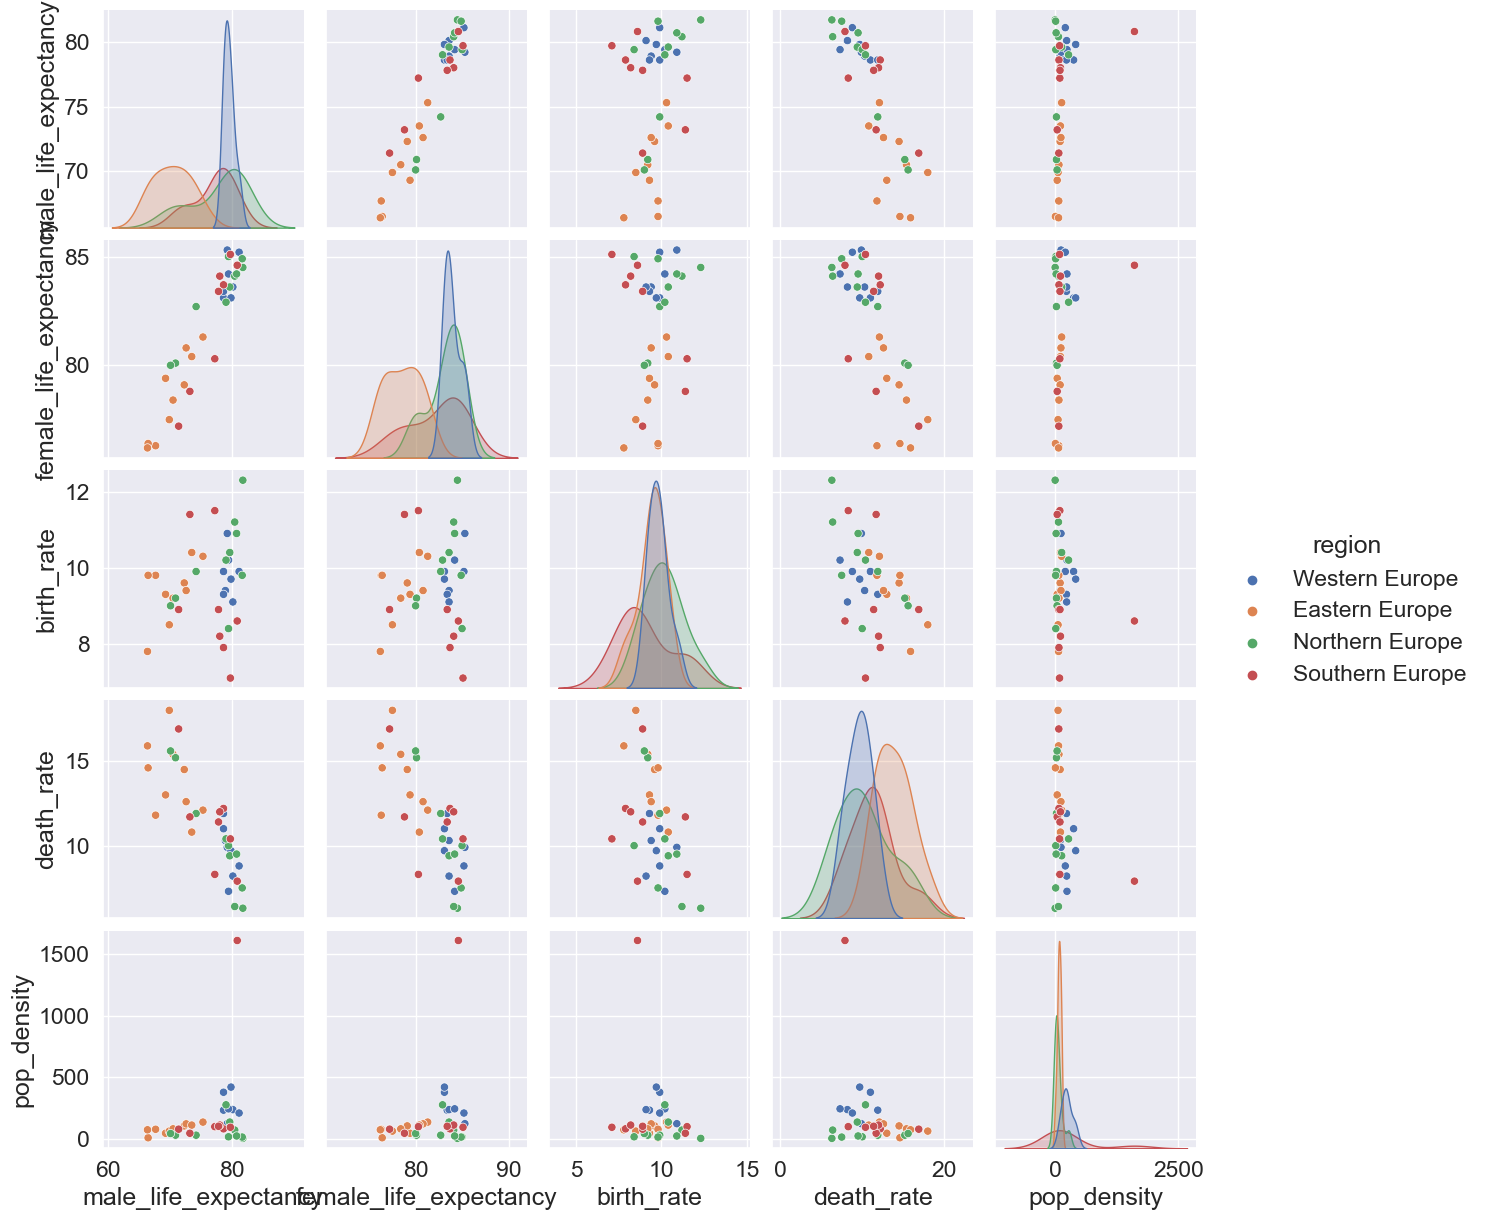

In [ ]:
sns.pairplot(df_EUpop.iloc[:, np.r_[2,6:11]], hue='region')

## Reminder: representing data (samples & features)
To describe a collection of **samples** we record a set of **features** for each sample.

For example, when describing countries in Europe as in the above data set, each country is a sample for which we've observed 11 features:
- country_name
- Continent
- region
- capital
- area
- population
- male_life_expectancy
- female_life_expectancy
- birth_rate
- death_rate
- pop_density

Some of these features are qualitative (country_name, Continent, region, capital), some are numeric (the others), some are unique (country_name, capital), and some are actually not useful at all (i.e. Continent, which is the same for every observation in this data set).

A numerical dataset can be represented as an array (we'll return to those categorical variables later on). 

**By convention, in Python ML we represent:**
- each sample as a row 
- each feature as a column

## Samples as vectors

In [ ]:
df_EUpop.head(3)

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
0,Austria,Europe,Western Europe,Vienna,83879,8917000,78.9,83.6,9.4,10.3,106.3
1,Belgium,Europe,Western Europe,Brussels,30530,11544000,78.6,83.1,9.9,11.0,378.1
2,France,Europe,Western Europe,Paris,549087,67380000,79.2,85.3,10.9,9.9,122.7


In [ ]:
# only focus on a few numerical features (for now)
col_num_list = ['male_life_expectancy', 'female_life_expectancy', 'birth_rate', 'death_rate', 'pop_density']
df_EUpop_num = df_EUpop.loc[:, col_num_list]

# we can always refer back to the original df_EUpop data set to remember the specific countries

df_EUpop_num.head()

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
0,78.9,83.6,9.4,10.3,106.3
1,78.6,83.1,9.9,11.0,378.1
2,79.2,85.3,10.9,9.9,122.7
3,78.6,83.4,9.3,11.9,232.6
4,80.1,83.6,9.1,8.2,236.9


Individual samples (countries) are considered, mathematically, as vectors.  When sklearn looks at the first country (Austria) it sees:

In [ ]:
np.array(df_EUpop_num.iloc[1, :])

array([ 78.6,  83.1,   9.9,  11. , 378.1])

## Distances between samples
Many ML tools require that these vectors have meaningful distances between them.  
- A pair of samples with a large distance between them are considered different
- A pair of smaples with a small distance between them are considered similar

Computing (the $\ell_2$, or Euclidean) distance between two vectors $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and $x' = \begin{bmatrix} x_1' \\ x_2' \end{bmatrix}$:

$$||x - x'||_2 = \sqrt{\sum_i (x_i - x_i')^2}$$

In words, to compute the distance between two vectors:
- we square the differences of each element
- add these values together
- compute the square root of this sum

How similar is Austria to Belgium?

In [ ]:
austria = df_EUpop_num.iloc[0, :]
austria

male_life_expectancy       78.9
female_life_expectancy     83.6
birth_rate                  9.4
death_rate                 10.3
pop_density               106.3
Name: 0, dtype: float64

In [ ]:
belgium = df_EUpop_num.iloc[1, :]
belgium

male_life_expectancy       78.6
female_life_expectancy     83.1
birth_rate                  9.9
death_rate                 11.0
pop_density               378.1
Name: 1, dtype: float64

In [ ]:
sq_diff_per_feat = [(78.9 - 78.6) ** 2, (83.6 - 83.1) ** 2, (9.4 - 9.9) ** 2, (10.3 - 11) ** 2, (106.3 - 378.1) ** 2]
l2_dist = sum(sq_diff_per_feat) ** .5
l2_dist

271.80198674770577

In and of itself, this distance isn't too insightful ... the countries are 272 ?unit? apart?  The value becomes more useful when compared to other distances.  Is Austria more similar to Belgium or France?

In [ ]:
austria = np.array(df_EUpop_num.iloc[0, :])
belgium = np.array(df_EUpop_num.iloc[1, :])
france = np.array(df_EUpop_num.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(austria - belgium)
l2_dist_quick_b = np.linalg.norm(austria - france)

print(f'distance between austria and belgium: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between austria and france: {l2_dist_quick_b:.3f}')

distance between austria and belgium: 271.802
distance between austria and france: 16.564


So: Austria and France are more similar since we observed:

distance between austria and belgium: 271.802

distance between austria and france: 16.564
    
Is this satisfying?  Lets break it out by feature:

In [ ]:
austria - belgium

array([   0.3,    0.5,   -0.5,   -0.7, -271.8])

In [ ]:
austria - france

array([ -0.3,  -1.7,  -1.5,   0.4, -16.4])

Intuitively, Austria and Belgium actually look mostly similar ... but their difference in population density is so large that it yields a large distance.

## Big Idea 1: Distances assume that a change of 1 unit (in any feature) is equally significant

What if we measured the population density of the cluntries in a different unit? I.e. instead of per square kilometer, we do just population itself?

In [ ]:
# replace pop density per square kilometer with pop density per square meter
df_EUpop_num['pop_density (m)'] = df_EUpop_num['pop_density'] / 1000000
del df_EUpop_num['pop_density']

df_EUpop_num.head(3)

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density (m)
0,78.9,83.6,9.4,10.3,0.000106
1,78.6,83.1,9.9,11.0,0.000378
2,79.2,85.3,10.9,9.9,0.000123


In [ ]:
austria = np.array(df_EUpop_num.iloc[0, :])
belgium = np.array(df_EUpop_num.iloc[1, :])
france = np.array(df_EUpop_num.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(austria - belgium)
l2_dist_quick_b = np.linalg.norm(austria - france)

print(f'distance between austria and belgium: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between austria and france: {l2_dist_quick_b:.3f}')

distance between austria and belgium: 1.039
distance between austria and france: 2.322


These numbers aren't just different, they claim an opposite conclusion: Austria and Belgium are more similar!

- **Distances assume that a change of 1 unit (in any feature) is equally significant**
- **Distances implicitly weight how important each feature is relative to others according to its variance**
    - a feature with a higher variance is responsible for more of the distances
    
To wrap all the different features into a single distance we must say *something* about how important one feature is compared to another.  

In [ ]:
df_EUpop_num.std()

male_life_expectancy      4.722496
female_life_expectancy    2.884291
birth_rate                1.109908
death_rate                2.968833
pop_density (m)           0.000268
dtype: float64

### Standardization (a type of Normalization):
How to scale your features so that they're equally important in our distance metric:

In [ ]:
# by subtracting each feature by the mean and dividing by the standard deviation, outputs will be "unit invariant"
df_EUpop_num_scaled = pd.DataFrame()
for feat in df_EUpop_num.columns:
    df_EUpop_num_scaled[f'{feat}_scaled'] = (df_EUpop_num[feat] - df_EUpop_num[feat].mean()) / df_EUpop_num[feat].std()

In [ ]:
df_EUpop_num_scaled.std()

male_life_expectancy_scaled      1.0
female_life_expectancy_scaled    1.0
birth_rate_scaled                1.0
death_rate_scaled                1.0
pop_density (m)_scaled           1.0
dtype: float64

In [ ]:
df_EUpop_num_scaled.head(3)

,male_life_expectancy_scaled,female_life_expectancy_scaled,birth_rate_scaled,death_rate_scaled,pop_density (m)_scaled
0,0.625846,0.607698,-0.197714,-0.355546,-0.187060
1,0.562320,0.434345,0.252774,-0.119763,0.827487
2,0.689372,1.197098,1.153749,-0.490279,-0.125844


Notice that in doing so, our units are no longer valid, so lets remove the units and return to the original labels:

In [ ]:
df_EUpop_num_scaled.columns =  ['male_life_expectancy',
                                'female_life_expectancy',
                                'birth_rate',
                                'death_rate',
                                'pop_density']
df_EUpop_num_scaled.head(3)

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
0,0.625846,0.607698,-0.197714,-0.355546,-0.187060
1,0.562320,0.434345,0.252774,-0.119763,0.827487
2,0.689372,1.197098,1.153749,-0.490279,-0.125844


Now, which countries are actually most similar?

In [ ]:
austria = np.array(df_EUpop_num_scaled.iloc[0, :])
belgium = np.array(df_EUpop_num_scaled.iloc[1, :])
france = np.array(df_EUpop_num_scaled.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(austria - belgium)
l2_dist_quick_b = np.linalg.norm(austria - france)

print(f'distance between austria and belgium: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between austria and france: {l2_dist_quick_b:.3f}')

distance between austria and belgium: 1.150
distance between austria and france: 1.483


# What do we do with categorical features?
## One hot encoding and "Dummy" variables
### (Representing categorical variables in the sample vector as numbers)

**One hot encoding:** replace each categorical column with a set of columns per each unique category.  These new columns (called dummy variables) have value 1 where the original row belonged to the corresponding category.

In [ ]:
# remind ourselves of the full data set
df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
0,Austria,Europe,Western Europe,Vienna,83879,8917000,78.9,83.6,9.4,10.3,106.3
1,Belgium,Europe,Western Europe,Brussels,30530,11544000,78.6,83.1,9.9,11.0,378.1
2,France,Europe,Western Europe,Paris,549087,67380000,79.2,85.3,10.9,9.9,122.7
3,Germany,Europe,Western Europe,Berlin,357580,83161000,78.6,83.4,9.3,11.9,232.6
4,Liechtenstein,Europe,Western Europe,Vaduz,161,38137,80.1,83.6,9.1,8.2,236.9


In [ ]:
# shuffle order of rows to better visualize how one-hot encoding works
df_EUpop = df_EUpop.sample(frac=1, random_state=2)

# grab only the first few rows
#df_EUpop = df_EUpop

df_EUpop.head()

,country_name,Continent,region,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density
12,Moldova,Europe,Eastern Europe,Moldova,33850,2620000,67.7,76.3,9.8,11.8,77.4
13,Poland,Europe,Eastern Europe,Warsaw,312680,37899000,72.6,80.8,9.4,12.6,121.2
28,Albania,Europe,Southern Europe,Tirana,28750,2838000,77.2,80.3,11.5,8.3,98.7
30,Malta,Europe,Southern Europe,Valletta,320,515332,80.8,84.6,8.6,7.9,1610.4
24,Lithuania,Europe,Northern Europe,Vilnius,65286,2795000,70.1,80.0,9.0,15.6,42.8


In [ ]:
pd.get_dummies(df_EUpop, columns=['region'], dtype='int')

,country_name,Continent,capital,area,population,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,pop_density,region_Eastern Europe,region_Northern Europe,region_Southern Europe,region_Western Europe
12,Moldova,Europe,Moldova,33850,2620000,67.7,76.3,9.8,11.8,77.4,1,0,0,0
13,Poland,Europe,Warsaw,312680,37899000,72.6,80.8,9.4,12.6,121.2,1,0,0,0
28,Albania,Europe,Tirana,28750,2838000,77.2,80.3,11.5,8.3,98.7,0,0,1,0
30,Malta,Europe,Valletta,320,515332,80.8,84.6,8.6,7.9,1610.4,0,0,1,0
24,Lithuania,Europe,Vilnius,65286,2795000,70.1,80.0,9.0,15.6,42.8,0,1,0,0
9,Bulgaria,Europe,Sofia,111000,6934000,69.9,77.5,8.5,18.0,62.5,1,0,0,0
27,United Kingdom,Europe,United Kingdom,243610,67215000,79.0,82.9,10.2,10.4,275.9,0,1,0,0
0,Austria,Europe,Vienna,83879,8917000,78.9,83.6,9.4,10.3,106.3,0,0,0,1
25,Norway,Europe,Oslo,385203,5379000,81.6,84.9,9.8,7.5,14.0,0,1,0,0
14,Romania,Europe,Bucharest,238400,19258000,70.5,78.4,9.2,15.4,80.8,1,0,0,0


# Intro to Machine Learning (w/ CS 3200 Students)

Before we move on (as we've already started a little bit into the key mathematical concepts), let's set up **WHY** we're about to do all this math and how we need to be careful moving forward with real data:

## What is *Machine Learning* anyway?

- Start with data: observed measures from the real world
- Develop a strategy of analysis that leads to choosing an appropriate algorithm
- "Learn" $\rightarrow$ improve the algorithm, identify patterns in the data
- Make predictions on new observations based on the results of the model, or clarify understanding of patterns

### Example ML Algorithms

#### Supervised Learning (Prediction)
- Linear Perceptron*
- Support Vector Machines
- Logistic Regression*
- Linear*, Multiple*, Polynomial* Regression
- Decision Trees, Random Forests**
- Time Series Models**
- Bayesian Models
- Nearest Neighbor Classifiers**
- Neural Networks

#### Unsupervised Learning (Inference)
- Principal Component Analysis*
- Factor Analysis
- Recommender Systems*
- K-means, Clustering**
- Gaussian Mixture Models
- Kernel Estimation

#### Key
- "*" means we will be (or would usually plan to) cover it in this course
- "**" means we'll have talked about the basic mathematical concepts that make these methods up, and are simple enough that I believe you could learn it on your own outside of class (and potentially apply it in a project setting)
- The rest are not too terribly difficult, though perhaps would require a bit more effort on your part to figure out.

## Ethics in Machine Learning (w/ CS 3200 Students)

Before getting into our first ML algorithm, let's discuss some important ideas that we need to keep in mind as we proceed. Though some of these ideas may seem obvious, they are not trivial and deserve our time.

What are some situations where ML is used in real life, where the use of the algorithm may pose ethical issues?

- Self-driving cars
- Facial recognition
- Speech recognition
- Financial analysis
- Government policy

What is a stereotype?

- A generalization of a group based on **one or few example(s)/identity/cultural assumptions**
- Stereotypes can be: negative, neutral, or positive but all raise concerns and can be harmful
  - Denial of services because of stereotype (either negative or positive)
  - Alienate people
  - Lead to discrimination in hiring
  - Make assessing health care more difficult

In data science, there are multiple types of bias, both technical (response, non-response, sampling) and non-technical. Non-technical biases include:

- A **representational bias** is when a system detracts from the representation of certain groups and their identities
  - Ex: Google translate (though excellent) may not quite work for some languages where the pronouns are not flexible. Try translating "She is a doctor" to Akan, then back to English using Google translate. What happens?
- An **allocative/allocation bias** is when a system unfairly allocates resources to certain group(s) over others.

Neither of these are necessarily easy to identify, but can have severe impacts on people's lives, and must be considered when building ML models with real data.

We like to think because ML is built upon mathematics that it is unbiased, but humans make choices about how to collect/classify data that is fed to these models, and it is **very difficult** to make sure data are unbiased. Data are not produced in a vacuum.

## Lecture Break/Exercise
### Machine Learning Ethics Debate 

**Rules**
- Group up into groups with 4 people on each (maybe your project group)
- Each group will pick one of the prompts below and split the group up into two teams.
- 2 per team, spend 5-10 minutes:
  - Team A: list at least 2 (preferably more) specific major ethics issues (incl. potential biases) you think are **capable** of being addressed about the prompt.
  - Team B: list at least 2 (preferably more) specific major ethics issues (incl. potential biases) you think are **impossible (or at least unlikely)** to be addressed given the prompt.
- Spend 5 minutes discussing in groups, seeing if there are any disagreements, coming to a consensus, etc.
- Spend 5 minutes as a class discussing.

### Prompts

1.

2.

3.

4.

#### Example/Hints (Things To Consider)

As you're coming up with your list of ethical issues, it can be helpful to remember that issues can arise during any part of the Data Science pipeline (from problem inception to dissemination and implementation of results).

To illustrate how you can identify some of the potential ethical issues in the pipeline, here is a hypothetical example of a machine learning-based algorithm for hiring people at a mid-size biotechnology company, and four potential areas across the pipeline where issues might arise:

1. First area: _clearly specifying the problem for which the ML algorithm is meant to be a solution_. In this case: what is the purpose or goal of incorporating ML algorithms in the hiring process? If your answer is something like, "Identifying the best-qualified applicants", then can you agree as a group on whether identifying "best qualified" is something that an algorithm can do? Given the data that you're able to gather about applicants, how might the algorithm (help to) identify the "best qualified"?
2. Second area: _understanding the data that you're able to gather_. In this case: where and how did you get information about past and current applicants? Are there obvious ways in which the dataset about  applicants is incomplete or distorted? Given the contents of the dataset, is it possible to compare the subsequent "performance" of applicants who were hired _and_ those who weren't?
3. Third area: _understanding that it's not just about the data_. In this case:  A model represents an objective function. What are the "goals" of the objective function?  To minimize the chance of false positives (i.e., accepting an applicant who isn't among "the best qualified")? To minimize the chance of false negatives (i.e., rejecting an applicant who is among the "best qualified")?  To provide equal odds of false positives and false negatives?
4. Fourth area: _understanding the context of use_. In this case: what is the larger system in which the hiring algorithm will be used? The people in the company must still decide whether and how to use that prediction. Must they use it to to decide whom to screen out, or could they use it in some other way? How closely does the context from which the training data came, resemble the context in which your hiring algorithm will be used? How might your company's use of a hiring algorithm influence what other companies do?